In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cross_validation, metrics

/home/nekorobov/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('vine.csv')

In [3]:
def split_data(df):
    Y = data['Type']
    X = data.drop(['Type'], axis=1)
    return X, Y

In [4]:
X = split_data(data)[0]
Y = split_data(data)[1]

In [5]:
def double_plot(X, Y, f1, f2):
    plt.figure(figsize=(5, 5))
    for n in range(1, 4):
        plt.scatter(data[data.Type == n][f1], data[data.Type == n][f2], label=n)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend()
    plt.show()


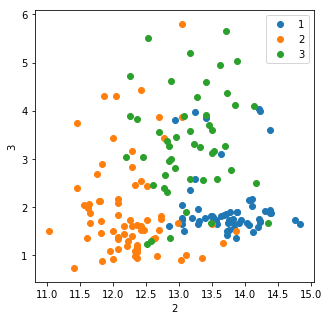

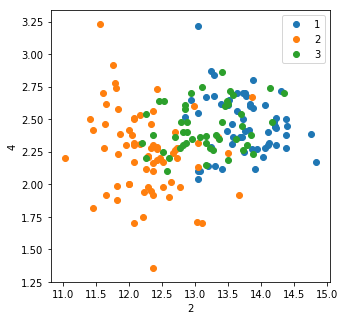

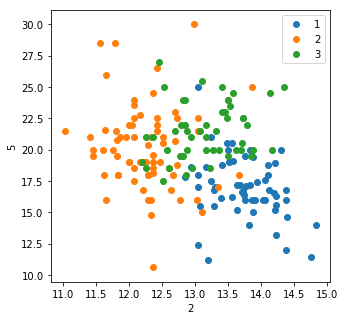

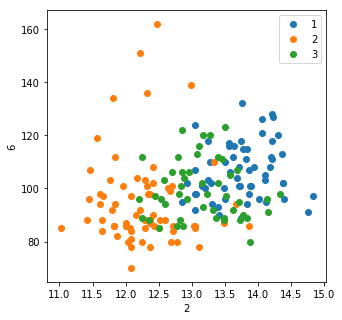

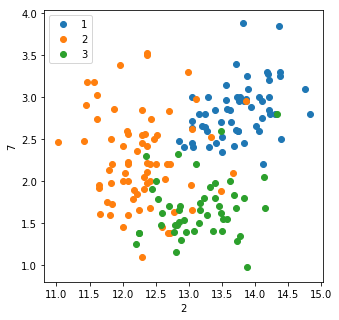

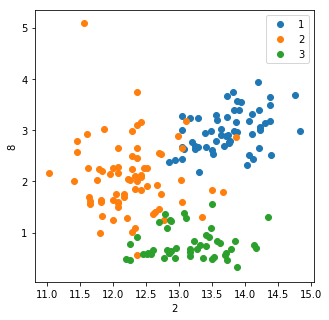

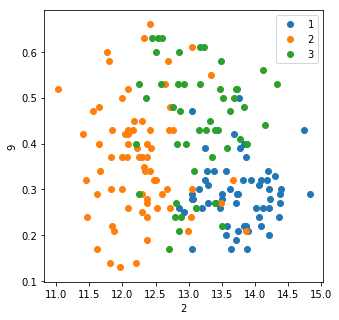

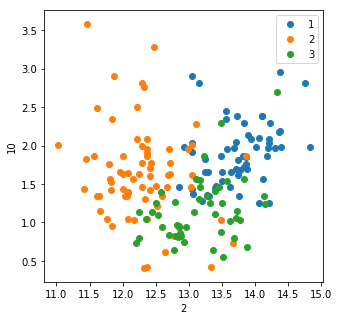

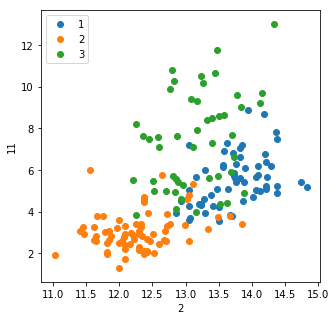

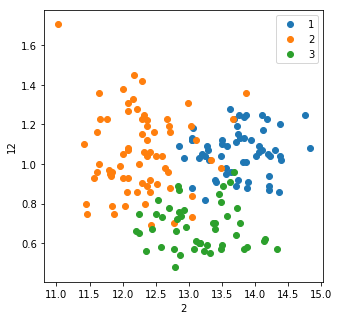

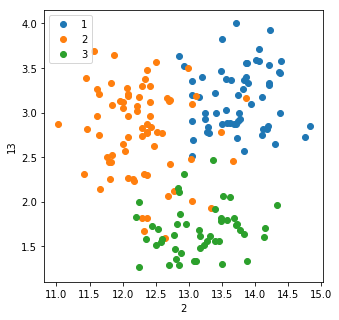

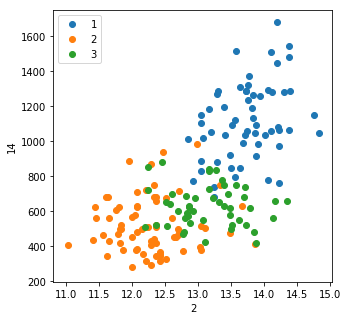

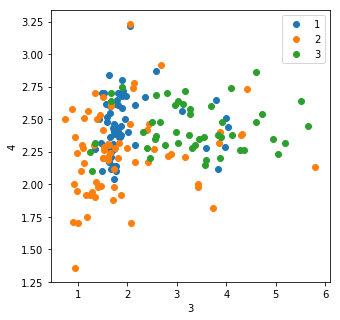

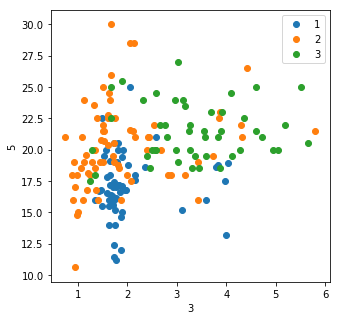

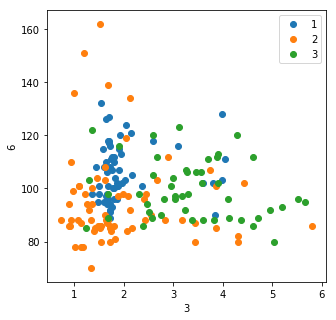

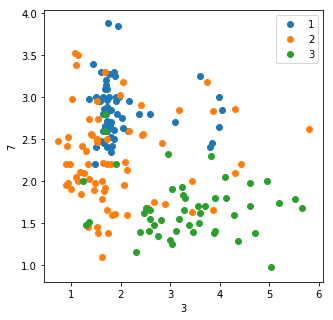

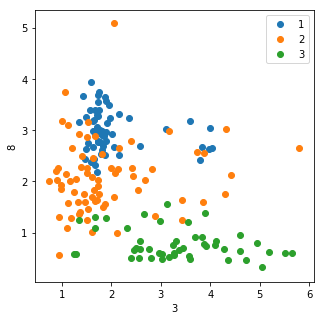

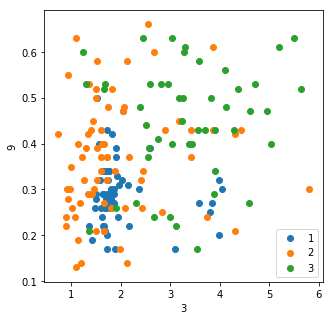

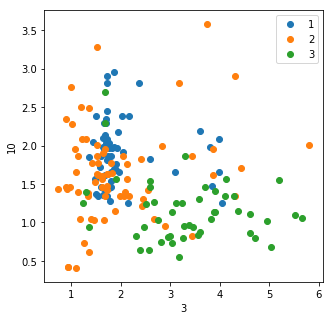

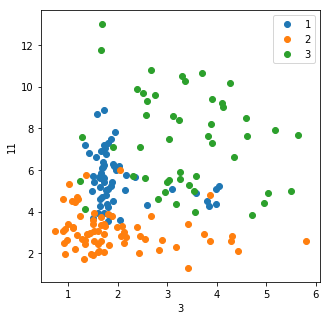

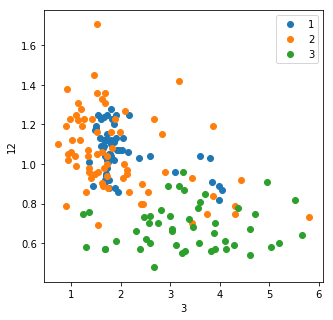

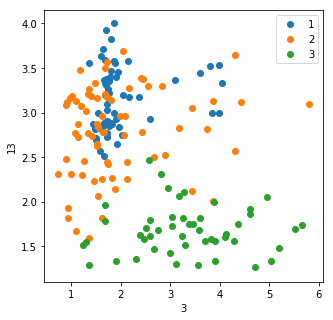

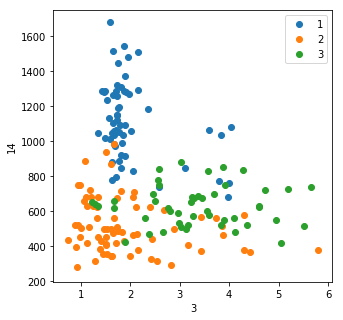

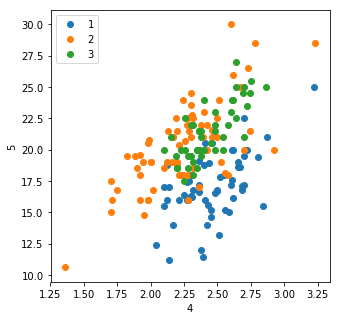

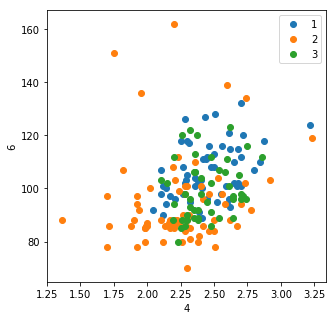

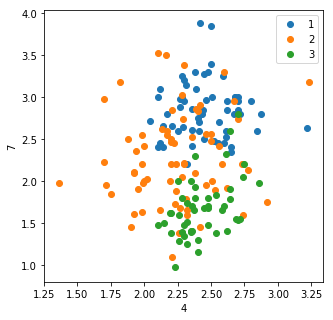

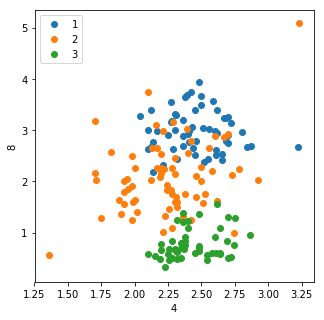

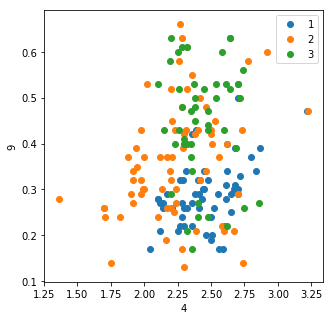

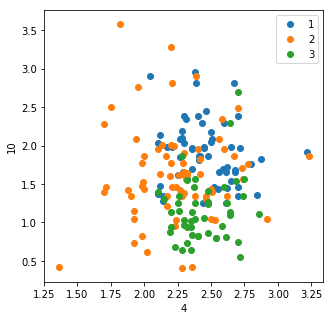

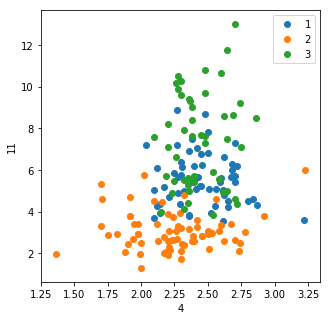

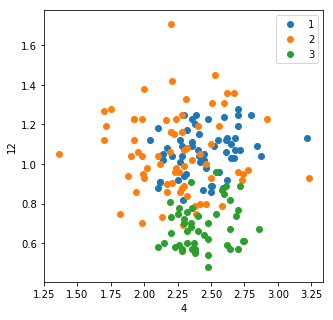

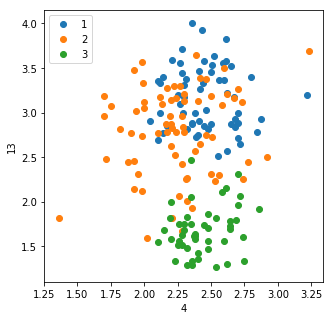

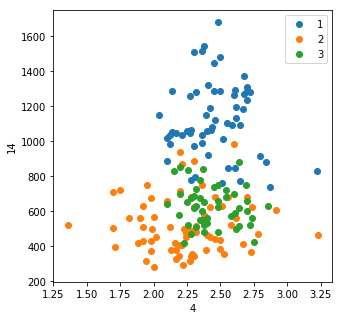

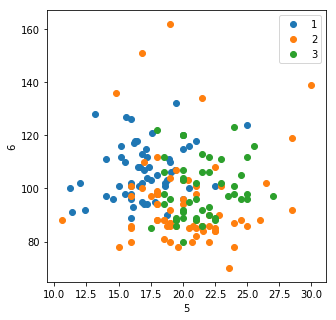

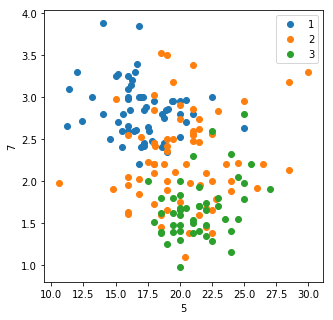

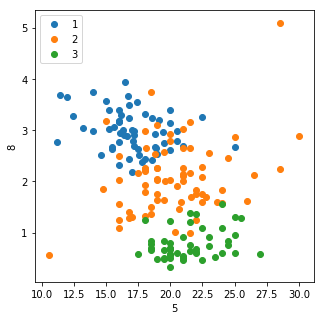

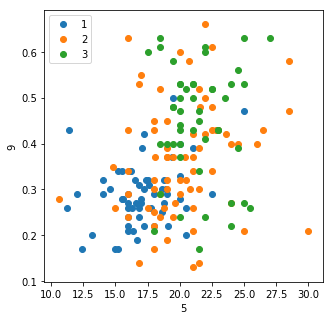

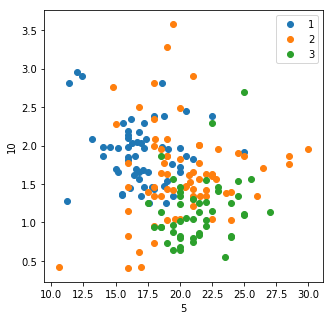

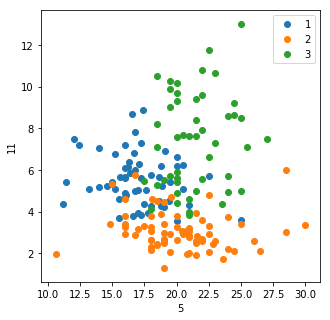

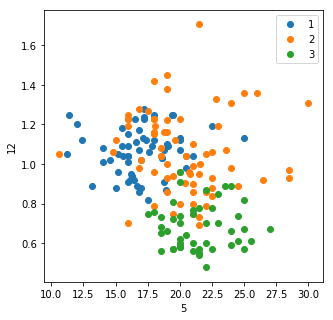

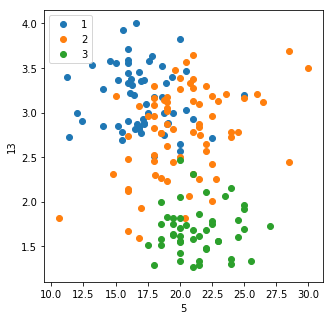

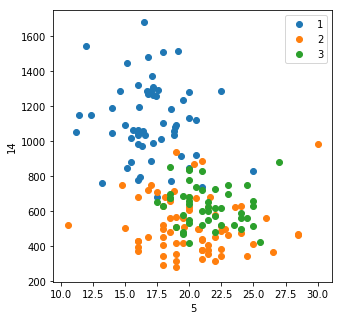

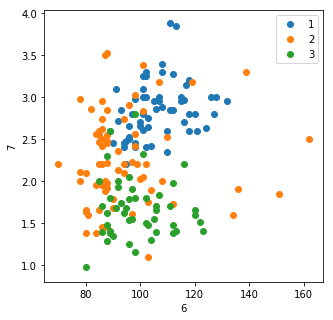

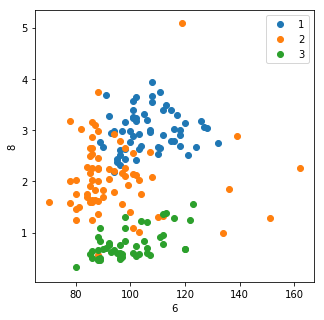

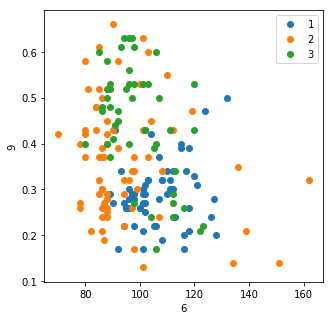

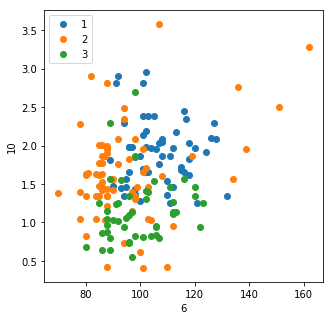

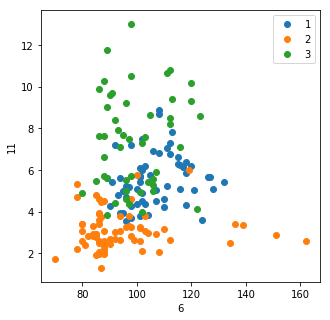

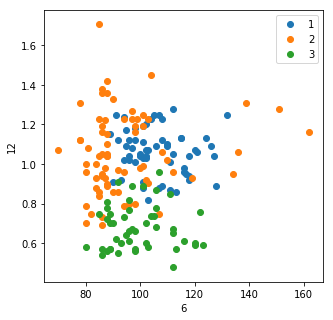

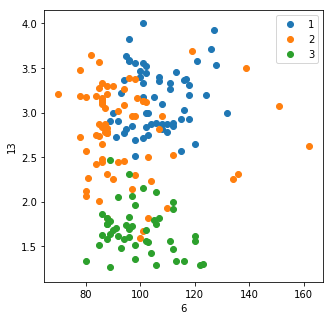

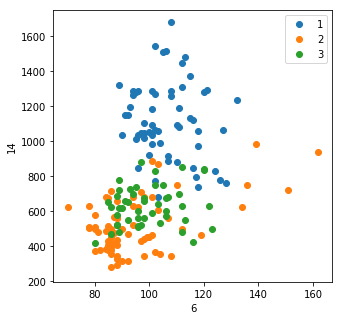

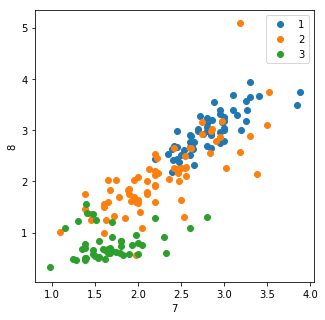

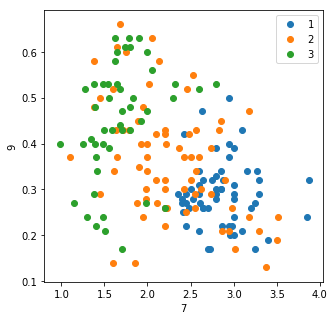

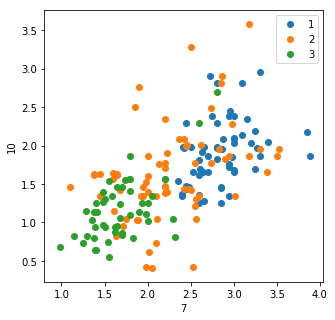

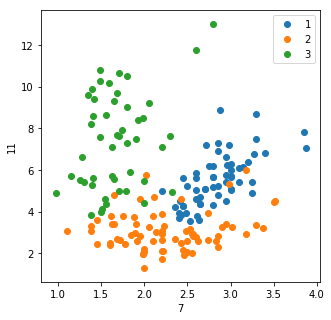

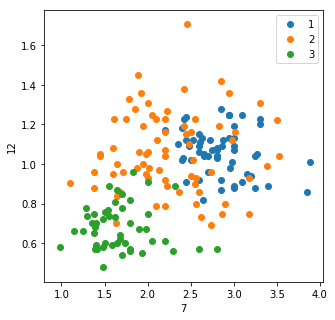

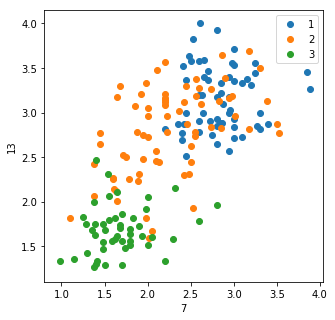

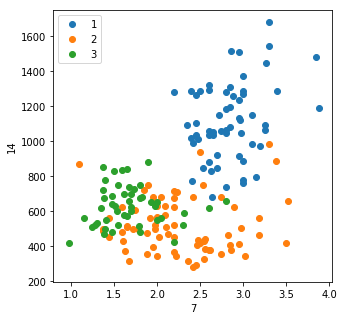

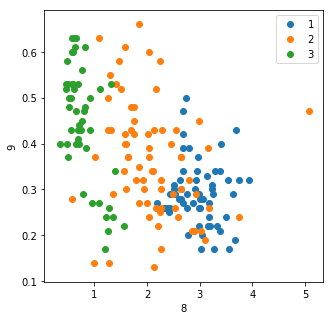

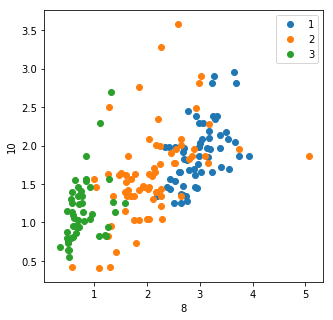

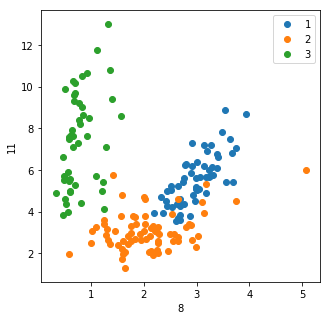

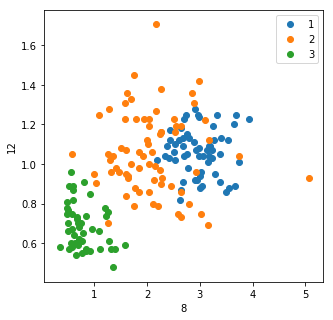

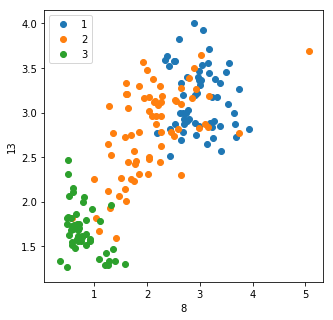

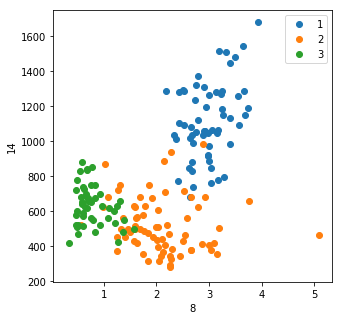

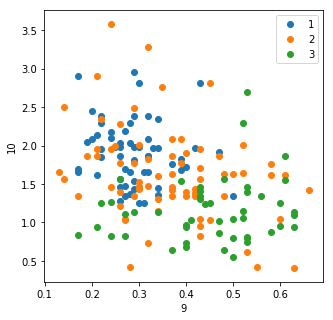

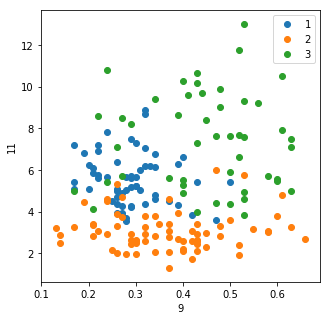

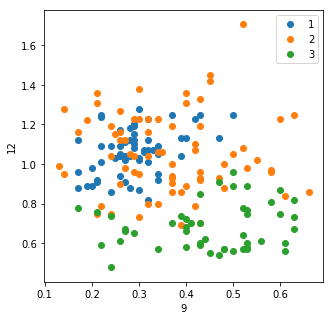

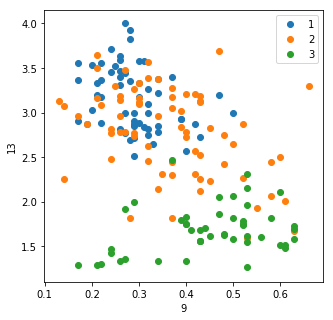

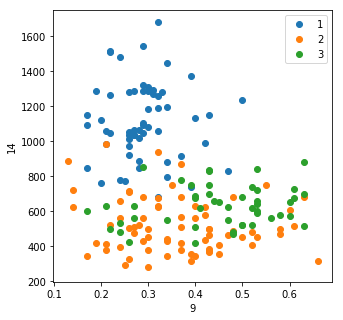

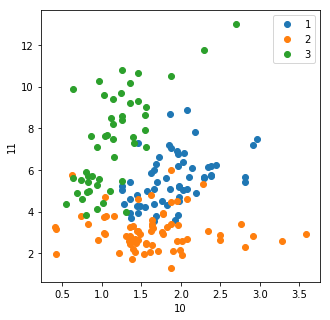

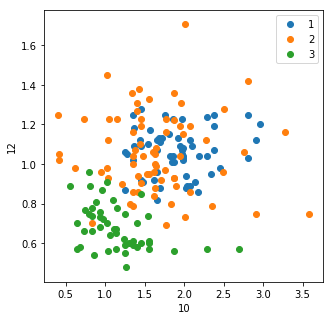

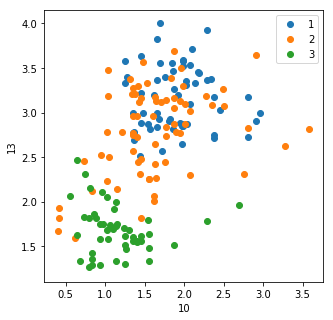

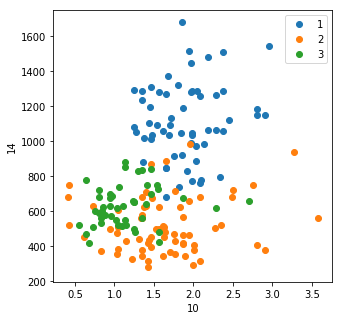

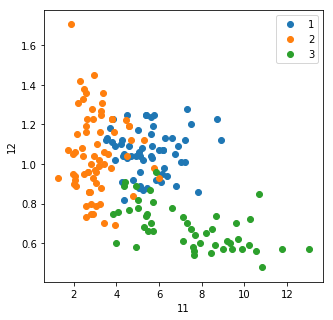

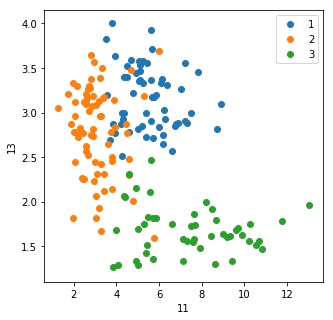

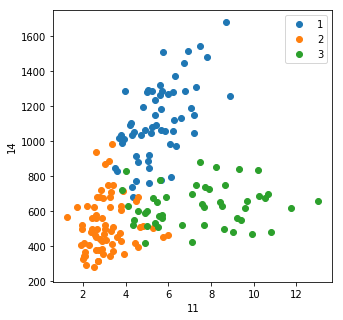

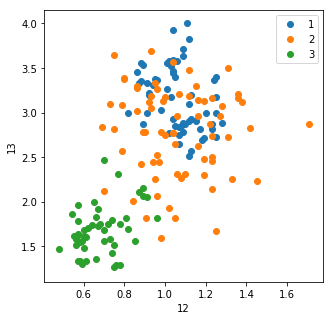

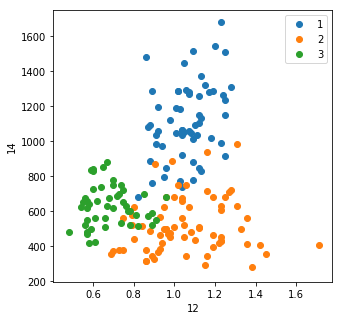

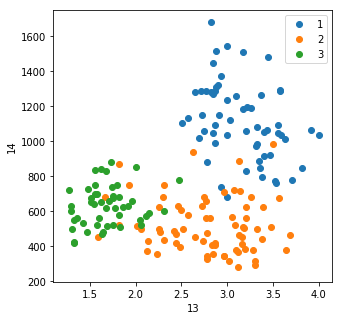

In [6]:
for i in range(len(X.columns)):
    if(i + 1 < len(X.columns)):
        for j in range(i + 1, len(X.columns)):
            double_plot(X, Y, X.columns[i], X.columns[j])

In [7]:
def fit_predict(X, Y, cur_metric, k):
    s = KNeighborsClassifier(metric=cur_metric, n_neighbors=k)
    #print(s)
    return 100 * np.mean(cross_val_score(s, X, Y, cv=3))

In [8]:
def data_processing(X, components):  
    scaler = StandardScaler()
    X_t = scaler.fit_transform(np.float32(X))
    pca = PCA(n_components=components)
    X_t = pca.fit_transform(X_t)
    print(sum(pca.explained_variance_ratio_))
    return pd.DataFrame(X_t)

In [9]:
X_p = data_processing(X, 8)

0.920175526291132


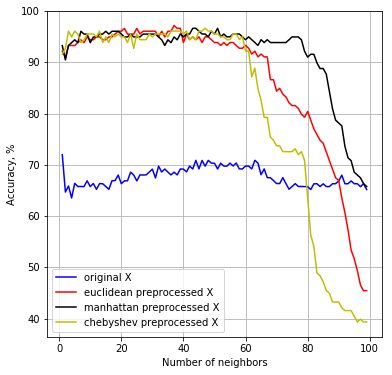

In [10]:
orig = []
prep = []
prep1 = []
prep2 = []
N_k = 100
x = np.linspace(1, N_k-1, N_k-1)
for k in range(1, N_k):
    orig.append(fit_predict(X, Y, 'euclidean', k))
    prep.append(fit_predict(X_p, Y, 'euclidean', k))
    prep1.append(fit_predict(X_p, Y, 'manhattan', k))
    prep2.append(fit_predict(X_p, Y, 'chebyshev', k))
plt.figure(figsize=(6, 6))
plt.plot(x, orig, color='b', label='original X')
plt.plot(x, prep, color='r', label='euclidean preprocessed X')
plt.plot(x, prep1, color='k', label='manhattan preprocessed X')
plt.plot(x, prep2, color='y', label='chebyshev preprocessed X')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy, %')
plt.grid()
plt.legend()
plt.show()

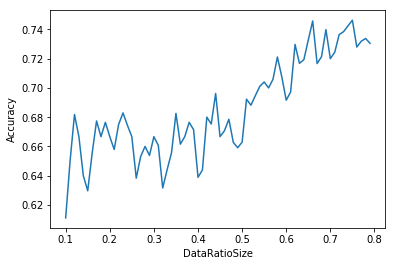

<Figure size 432x288 with 0 Axes>

In [11]:
x = np.arange(0.1, 0.8, 0.01)
y = []
neig = KNeighborsClassifier(n_neighbors=10)
for i in x:
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, Y, test_size = i, random_state = 1)
    neig.fit(train_data, train_labels)
    predict_KNeighbors = neig.predict(test_data)
    accuracy_KNeighbors = metrics.accuracy_score(predict_KNeighbors, test_labels)
    y.append(accuracy_KNeighbors)

plt.plot(x, y)
plt.ylabel('Accuracy')
plt.xlabel('DataRatioSize')
plt.show()
plt.savefig('HW3.png')